In [2]:
import torch
from botorch.models import SingleTaskGP
from botorch.models.transforms import Normalize, Standardize
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import LogExpectedImprovement, UpperConfidenceBound
from botorch.acquisition.analytic import LogProbabilityOfImprovement, ProbabilityOfImprovement
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.optim import optimize_acqf
import numpy as np
import matplotlib.pyplot as plt

def poly(x):
    return (-0.001 * x**6 + 0.003 * x**5 + 0.062 * x**4 - 
            0.174 * x**3 - 0.673 * x**2 + 1.323 * x + 1.764)

def acquisition_plotter(acq_list, plot_x):
    
    for acq_func in acq_list:
        plot_y = acq_func(plot_x.unsqueeze(-2)).detach()

    pi = PI(plot_x_tensor.unsqueeze(-2)).detach()
    fig, axs = plt.subplots(2)
    axs[0].plot(plot_x_tensor.numpy(), ei.numpy(), color="orange", linestyle='dashed', label='EI')
    axs[0].set_title("Expected Improvement of Surrogate GP")
    fig.subplots_adjust(hspace=0.5)
    axs[1].plot(plot_x_tensor.numpy(), pi.numpy(), color="orange", linestyle='dashed', label='PI')
    axs[1].set_title("Probability of Improvement of Surrogate GP")
    fig.legend()

c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_X = np.random.uniform(low = -5, high = 5, size = 10)
Y = poly(train_X)
Y = torch.tensor(Y.reshape(-1,1))
Y = Y  #+ 0.1 * torch.randn_like(Y)  # add some noise
train_X = torch.tensor(train_X.reshape(-1,1))

In [4]:
gp = SingleTaskGP(
  train_X=train_X,
  train_Y=Y,
  input_transform=Normalize(d=1),
  outcome_transform=Standardize(m=1),
)
mll = ExactMarginalLogLikelihood(gp.likelihood, gp)

logEI = LogExpectedImprovement(model=gp, best_f=Y.max())
PI = ProbabilityOfImprovement(model=gp, best_f=Y.max())

In [5]:
bounds = torch.stack([torch.zeros(1), torch.ones(1)]).to(torch.double)
candidate, acq_value = optimize_acqf(
  logEI, bounds=bounds, q=1, num_restarts=5, raw_samples=20,
)
candidate  # tensor([[0.2981, 0.2401]], dtype=torch.float64)

tensor([[1.]], dtype=torch.float64)

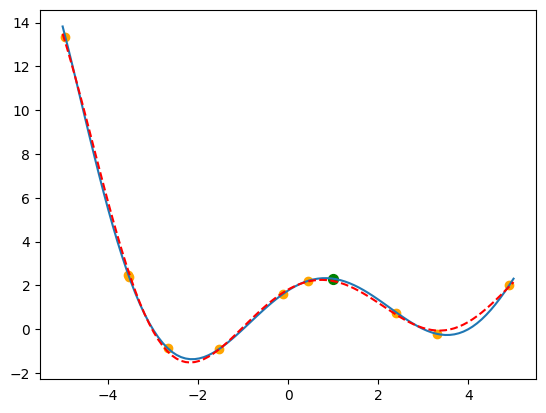

In [6]:
plot_x = np.linspace(-5,5,100)
plot_y = poly(plot_x)
plot_x_tensor = torch.tensor(plot_x.reshape(-1,1))
with torch.no_grad():
    gp_mean, gp_var = gp.posterior(plot_x_tensor).mean, gp.posterior(plot_x_tensor).variance


plt.plot(plot_x,plot_y)
plt.scatter(train_X,Y, color = 'orange')
plt.plot(plot_x_tensor.numpy(), gp_mean.numpy(), label="GP Mean", color="red", linestyle='dashed')
plt.scatter(candidate, poly(candidate), color = 'green', marker='o', s= 50)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

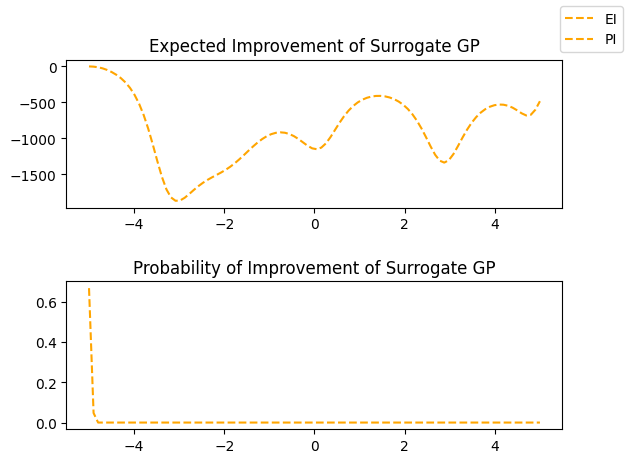

In [ ]:
ei = logEI(plot_x_tensor.unsqueeze(-2)).detach()
pi = PI(plot_x_tensor.unsqueeze(-2)).detach()
fig, axs = plt.subplots(2)
axs[0].plot(plot_x_tensor.numpy(), 0(), color="orange", linestyle='dashed', label='EI')
axs[0].set_title("Expected Improvement of Surrogate GP")
fig.subplots_adjust(hspace=0.5)
axs[1].plot(plot_x_tensor.numpy(), pi.numpy(), color="orange", linestyle='dashed', label='PI')
axs[1].set_title("Probability of Improvement of Surrogate GP")
fig.legend()

print(plot_x)